COLOR HISTOGRAM ENHANCEMENT TECHNIQUES

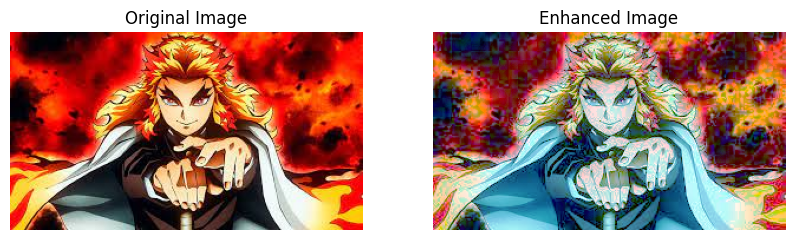

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg')
# Convert the image to the RGB color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Calculate histograms for each channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Normalize the histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)
image_enhanced = cv2.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(image_enhanced)
plt.axis('off')

plt.show()



Here are doing the image enhancement using color histogram equilization.As we get the corresponding histograms in each channel we need to normalize it.After that we simply need to merge the channels.

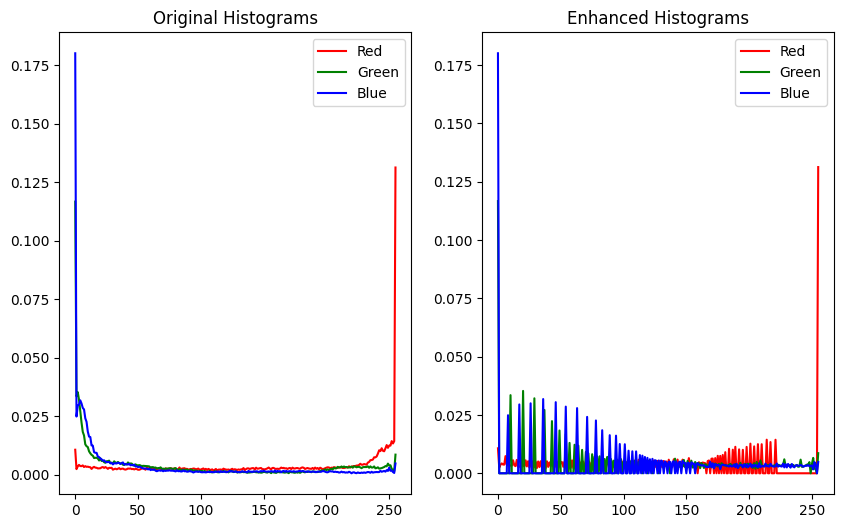

In [9]:
hist_r_eq = cv2.calcHist([r_eq], [0], None, [256], [0, 256])
hist_g_eq = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
hist_b_eq = cv2.calcHist([b_eq], [0], None, [256], [0, 256])

# Normalize the histograms of the enhanced image
hist_r_eq /= hist_r_eq.sum()
hist_g_eq /= hist_g_eq.sum()
hist_b_eq /= hist_b_eq.sum()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Original Histograms")
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Enhanced Histograms")
plt.plot(hist_r_eq, color='red', label='Red')
plt.plot(hist_g_eq, color='green', label='Green')
plt.plot(hist_b_eq, color='blue', label='Blue')
plt.legend()

plt.show()








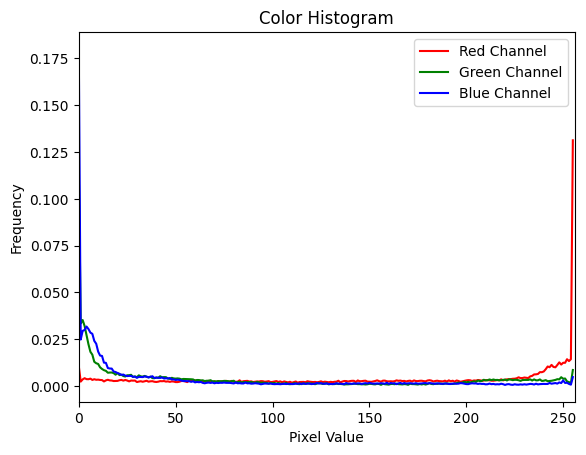

In [5]:
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.legend()
plt.show()

(-0.5, 298.5, 167.5, -0.5)

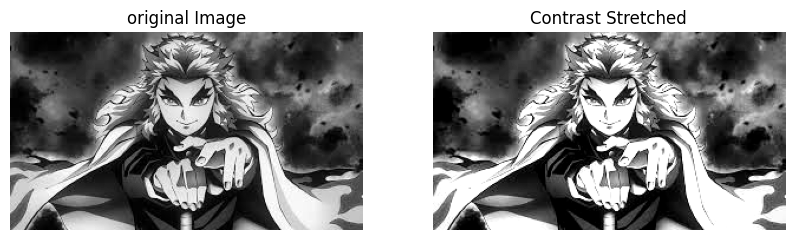

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the minimum and maximum intensity values after stretching
min_intensity = 10
max_intensity = 200

# Apply contrast stretching
stretched = np.piecewise(image, [image < min_intensity, image > max_intensity],
                        [0, 255, lambda x: ((x - min_intensity) / (max_intensity - min_intensity)) * 255])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title("original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Contrast Stretched")
plt.imshow(stretched,cmap='gray')
plt.axis('off')


We see the contrast of the image is improved.Also the the features which were indistinct due to low contrast are clearly visible.By adjusting the values of minimum and maximum intensity the control of contrast enhancement is controlled.

(-0.5, 298.5, 167.5, -0.5)

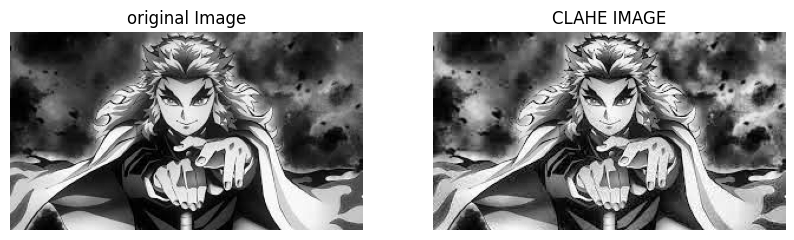

In [6]:
import cv2

# Load the image
image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# Apply CLAHE to the image
clahe_image = clahe.apply(image)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title("original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("CLAHE IMAGE")
plt.imshow(clahe_image,cmap='gray')
plt.axis('off')

Since Clahe is effective at enhancing local contrast,we can clearly visible in the output image.Also there is improved visibility in the enhanced image.Using the clipLimit we can control the extent of enhancement and tileGridSiz determines the size of the grid used for adaptive equalization.
